In [1]:
%reload_ext memory_profiler
import autograd.numpy as anp

from memory_profiler import profile
import numpy as np

from qutip import (qsave,qload)
import matplotlib.pyplot as plt
from scipy.sparse import dia_matrix
%matplotlib inline

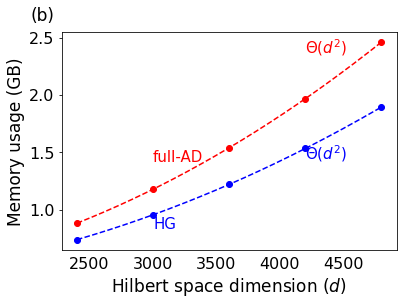

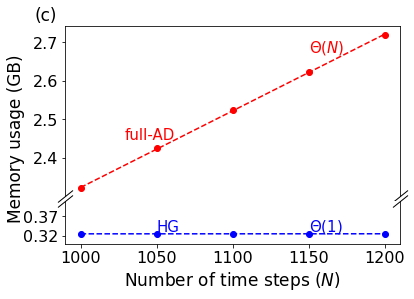

In [95]:
def plot_Nfixed(h_dim,N,memory_ma,memory_ad):
    x = (np.array(h_dim))
    fig, ax1 = plt.subplots()
    power=2
    fit = np.polyfit(x**power, memory_ad, 1)
    a=fit[0]
    b=fit[1]
    xx=np.linspace(2400,4800,200)
    y=a*np.power(xx**power,1)+b
    ax1.plot(xx,y,'--',color='red',label='full-AD')
    ax1.scatter(x,memory_ad,color='red')
    power=2
    fit = np.polyfit(x**power, memory_ma, 1)
    a=fit[0]
    b=fit[1]
    y=a*np.power(xx,power)+b
    ax1.plot(xx,y,'--',color='blue',label='HG')
    ax1.scatter(x,memory_ma,color='blue')
    ax1.tick_params(bottom=False)
    ax1.set_ylabel('Memory usage (GB)')
    ax1.set_xlabel('Hilbert space dimension $(d)$')
    ax1.annotate('full-AD',
      xy     = (     x[1], memory_ad[1]),
      xytext = (x[1], 1.2*memory_ad[1]),
      color  = 'red',fontsize=15)
    ax1.annotate('HG',
      xy     = (     x[1], memory_ma[1]),
      xytext = (x[1], 0.87*memory_ma[1]),
      color  = 'blue',fontsize=15)
    ax1.annotate('$\Theta(d^{2})$',
      xy     = (     x[3], memory_ad[3]),
      xytext = (x[3], 1.2*memory_ad[3]),
      color  = 'red',fontsize=15)
    ax1.annotate('$\Theta(d^{2})$',
      xy     = (     x[3], memory_ma[3]),
      xytext = (x[3], 0.94*memory_ma[3]),
      color  = 'blue',fontsize=15)
    ax1.xaxis.label.set_size(17)
    ax1.yaxis.label.set_size(17)
    ax1.tick_params(axis ='both', 
               labelsize = 16, )
#     ax1.yaxis.set_label_coords(-0.11, 2.5)
    y_lim=ax1.get_ylim()[1]
    ax1.text(2035, y_lim+0.1, '(b)',
        fontsize = 17)
    plt.show()
    fig.savefig('state_memory_Nfixed.pdf',bbox_inches='tight')
    plt.close(fig)
N=40
h_dims=6*np.array([400,500,600,700,800])
state_ma_N=np.array([701.2734375, 910.875, 1164.7734375, 1462.22265625, 1803.77734375])/953.674316
state_ad_N=np.array([837.85,1123.33,1469.7,1876.2,2343.09])/(953.674316)
plot_Nfixed(h_dims,N,state_ma_N,state_ad_N)

N_=[1000,1050,1100,1150,1200]
h_dim=400
memory_ma=np.array([309.9, 310.01, 310.02, 310.02, 310.04])/953.674316
memory_ad=np.array([2213.41796875, 2312.51953125, 2405.9375, 2499.953125, 2593.3515625])/953.674316
x = np.array(N_)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,gridspec_kw={'height_ratios': [4, 1]})
fit = np.polyfit(x, memory_ad, 1)
a=fit[0]
b=fit[1]
xx=np.linspace(1000,1200,200)
y=a*np.power(xx,1)+b
ax1.plot(xx,y,'--',color='red',label='full-AD')
ax1.scatter(x,memory_ad,color='red')
fit = np.polyfit(x, memory_ma, 1)
a=fit[0]
b=fit[1]
y=a*np.power(xx,1)+b
ax2.plot(xx,y,'--',color='blue',label='AG')
ax2.scatter(x,memory_ma,color='blue')
ax1.set_ylim()  # 子图1设置y轴范围，只显示部分图
ax2.set_ylim(0.3,2.6/2.2*0.31+0.04)  # 子图2设置y轴范围，只显示部分图
ax1.spines['bottom'].set_visible(False)#关闭子图1中底部脊
ax2.spines['top'].set_visible(False)##关闭子图2中顶部脊
ax1.annotate('full-AD',
      xy     = (     x[1], memory_ad[1]),
      xytext = (0.98*x[1], 1.01*memory_ad[1]),
      color  = 'red',fontsize=15)
ax2.annotate('HG',
      xy     = (     x[1], memory_ma[1]),
      xytext = (x[1], 1.02*memory_ma[1]),
      color  = 'blue',fontsize=15)
ax1.annotate('$\Theta(N)$',
      xy     = (     x[3], memory_ad[3]),
      xytext = (x[3], 1.02*memory_ad[3]),
      color  = 'red',fontsize=15)
ax2.annotate('$\Theta(1)$',
      xy     = (     x[3], memory_ma[3]),
      xytext = (x[3], 1.02*memory_ma[3]),
      color  = 'blue',fontsize=15)
ax1.tick_params(bottom=False)
ax2.set_ylabel('Memory usage (GB)')
ax2.set_xlabel('Number of time steps $(N)$')
ax1.xaxis.label.set_size(17)
ax1.yaxis.label.set_size(17)
ax2.xaxis.label.set_size(17)
ax2.yaxis.label.set_size(17)

ax1.tick_params(axis ='both', 
               labelsize = 16, )
ax2.tick_params(axis ='both', 
            labelsize = 16, )
ax2.yaxis.set_label_coords(-0.12, 2.5)
plt.yticks([0.32,0.37])
plt.subplots_adjust(hspace=.05)
d = .8  #设置倾斜度
    #绘制断裂处的标记
    
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15,
              linestyle='none', color='black', mec='black', mew=1, clip_on=False)
y_lim=ax1.get_ylim()[1]
ax1.text(970, y_lim+0.015, '(c)',
        fontsize = 17)
ax1.plot([0, 1], [0, 0],transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
fig.savefig('state_memory_lfixed.pdf',bbox_inches='tight')
plt.show()

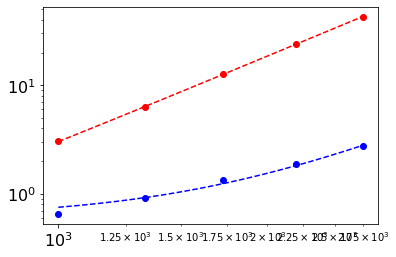

In [40]:
dim=np.array([10,11,12,13,14])**3
mem_ma=np.array([618.78125, 874.96875, 1270.0703125, 1806.49609375, 2604.4765625])/953.674316
mem_ad=np.array([2912.95,6006.05,12042.62,22696.16,40979.35])/(953.674316)
fig, (ax) = plt.subplots()
power=8/3
fit = np.polyfit(dim**power, mem_ma, 1)
xx=np.linspace(10**3,14**3,200)
x=dim
a=fit[0]
b=fit[1]
y=(a*np.power(xx,power)+b)
ax.scatter(x, mem_ma, color='blue')
ax.plot(xx,y,'--', color='blue',)

power=8/3
fit = np.polyfit(dim**power, mem_ad, 1)
a=fit[0]
b=fit[1]
y=(a*np.power(xx,power)+b)
ax.scatter(x, mem_ad, color='red')
ax.plot(xx,y,'--', color='red',)
ax.tick_params(axis ='both', 
               labelsize = 16, )
plt.yscale('log')
plt.xscale('log')
# ax.xaxis.set_major_formatter(plt.NullFormatter())


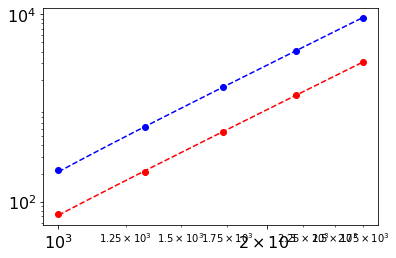

In [38]:
dim=np.array([10,11,12,13,14])**3
time_ad=np.array([74.27, 209.89, 561.39, 1367.28, 3085.54])
time_ma=np.array([219.61, 632.09, 1658.56, 4074.56, 9220.84])
fig, (ax) = plt.subplots()
power=3+2/3
fit = np.polyfit(dim**power, time_ma, 1)
xx=np.linspace(10**3,14**3,200)
x=dim
a=fit[0]
b=fit[1]
y=(a*np.power(xx,power)+b)
ax.scatter(x, time_ma, color='blue')
ax.plot(xx,y,'--', color='blue',)

power=3+2/3
fit = np.polyfit(dim**power, time_ad, 1)
a=fit[0]
b=fit[1]
y=(a*np.power(xx,power)+b)
ax.scatter(x, time_ad, color='red')
ax.plot(xx,y,'--', color='red',)
ax.tick_params(axis ='both', 
               labelsize = 16, )
plt.yscale('log')
plt.xscale('log')
# ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.set_xticks([1000,2000])
ax.set_yticks([1e2,1e4])
fig.savefig('inset.pdf',bbox_inches='tight')

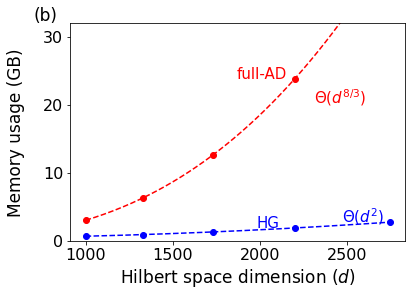

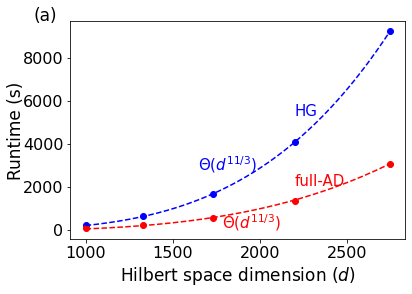

In [52]:
import numpy as np
dim=np.array([10,11,12,13,14])**3
ms=0.1*np.array([160,200,6*41,7*42,8*43])
time_ad=np.array([74.27, 209.89, 561.39, 1367.28, 3085.54])
time_ma=np.array([219.61, 632.09, 1658.56, 4074.56, 9220.84])
mem_ma=np.array([618.78125, 874.96875, 1270.0703125, 1806.49609375, 2604.4765625])/953.674316
mem_ad=np.array([2912.95,6006.05,12042.62,22696.16,40979.35])/(953.674316)
x=dim=np.array([10,11,12,13,14])**3
fig, ax1 = plt.subplots()

fit = np.polyfit(dim**2, mem_ma, 1)
a=fit[0]
b=fit[1]
xx=np.linspace(10**3,14**3,200)
y=(a*np.power(xx,2)+b)
ax1.plot(xx, y, '--',color='blue', label = 'Manual')
ax1.scatter(x, mem_ma, color='blue')
ax1.tick_params(axis ='both', 
               labelsize = 16, )
ax1.set_xlabel ('Hilbert space dimension $(d)$')
ax1.xaxis.label.set_size(17)
ax1.yaxis.label.set_size(17)

ax1.annotate('HG',
      xy     = (     x[3], mem_ma[3]),
      xytext = (0.9*x[3], mem_ma[3]),
      color  = 'blue',fontsize=15)
ax1.annotate('full-AD',
      xy     = (     x[3], mem_ad[3]),
      xytext = (0.85*x[3], mem_ad[3]),
      color  = 'red',fontsize=15)
ax1.annotate('$\Theta(d^2)$',
      xy     = (     x[4], mem_ma[4]),
      xytext = (0.9*x[4], mem_ma[4]),
      color  = 'blue',fontsize=15)
ax1.annotate('$\Theta(d^{8/3})$',
      xy     = (     x[3], mem_ad[3]),
      xytext = (1.05*x[3], 0.85*mem_ad[3]),
      color  = 'red',fontsize=15)

power=2+2./3
fit = np.polyfit(dim**power, mem_ad, 1)
a=fit[0]
b=fit[1]
y=(a*np.power(xx,power)+b)
ax1.plot(xx, y,'--', color='red', label = 'Auto-grad')
ax1.scatter(x, mem_ad, color='red')
ax1.set_ylabel ( "Memory usage (GB)")
ax1.set_ylim(0,32)
ax1.tick_params(axis ='both', 
               labelsize = 16, )

ax1.yaxis.set_label_coords(-0.135, 0.5)
y_lim=ax1.get_ylim()[1]+0.34
ax1.text(700, y_lim, '(b)',
        fontsize = 17)
plt.show()
fig.savefig('gate_memory.pdf',bbox_inches='tight')




fig, ax2 = plt.subplots()
power=3+2/3
fit = np.polyfit((x)**power, time_ma, 1)
a=fit[0]
b=fit[1]
y=(a*np.power(xx**power,1)+b)
ax2.plot(xx, y, '--',color='blue', label = 'Manual')
ax2.scatter(x, time_ma, color='blue')
ax2.annotate('$\Theta(d^{11/3})$',
      xy     = (     x[-1], time_ma[-1]),
      xytext = (0.6*x[-1], 0.3*time_ma[-1]),
      color  = 'blue',fontsize=15)
ax2.annotate('$\Theta(d^{11/3})$',
      xy     = (     x[-1], time_ad[-1]),
      xytext = (0.65*x[-1], 0.03*time_ad[-1]),
      color  = 'red',fontsize=15)
ax2.annotate('HG',
      xy     = (     x[3], time_ma[3]),
      xytext = (x[3], 1.3*time_ma[3]),
      color  = 'blue',fontsize=15)
ax2.annotate('full-AD',
      xy     = (     x[3], time_ad[3]),
      xytext = (x[3], 1.5*time_ad[3]),
      color  = 'red',fontsize=15)
power=3.5
fit = np.polyfit(x**power, time_ad, 1)
a=fit[0]
b=fit[1]
y=a*np.power(xx**power,1)+b
ax2.plot(xx, y,'--', color='red', label = 'Auto-grad')
ax2.scatter(x, time_ad, color='red')
ax2.set_ylabel ( "Runtime (s)")
ax2.set_xlabel ('Hilbert space dimension $(d)$')


ax2.xaxis.label.set_size(17)
ax2.yaxis.label.set_size(17)
ax2.tick_params(axis ='both', 
           labelsize = 16, )


ax2.tick_params(axis ='both', 
               labelsize = 16, )
ax2.xaxis.label.set_size(17)
ax2.yaxis.label.set_size(17)
ax2.yaxis.set_label_coords(-0.135, 0.5) 
y_lim=ax2.get_ylim()[1]+20
ax2.text(700, y_lim, '(a)',
        fontsize = 17)
plt.show()
fig.savefig('gate_time.pdf',bbox_inches='tight')
    


1.458582789849933e-08
1.1453099675518616e-08


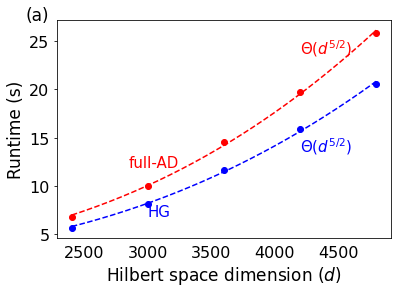

In [15]:
def plot_time(dim,memory_ma,memory_ad):
    x=np.array(dim)**1
    fig,ax1 = plt.subplots()
    power=2.5
    fit = np.polyfit(dim**power, memory_ad, 1)
    a=fit[0]
    print(a)
    b=fit[1]
    xx=np.linspace(2400,4800,200)
    
    y=a*np.power(xx,power)+b
    ax1.plot(xx,y,'--',color='red',label='AD')
    ax1.scatter(x,memory_ad,color='red')
    power=2.5
    fit = np.polyfit(dim**power, memory_ma, 1)
    a=fit[0]
    print(a)
    b=fit[1]
    y=a*np.power(xx,power)+b
    ax1.plot(xx,y,'--',color='blue',label='AG')
    ax1.scatter(x,memory_ma,color='blue')
    ax1.tick_params(bottom=False)
    ax1.annotate('full-AD',
      xy     = (     x[1], memory_ad[1]),
      xytext = (0.95*x[1], 1.2*memory_ad[1]),
      color  = 'red',fontsize=15)
    ax1.annotate('HG',
      xy     = (     x[1], memory_ma[1]),
      xytext = (x[1],0.85*memory_ma[1]),
      color  = 'blue',fontsize=15)
    ax1.annotate('$\Theta(d^{5/2})$',
      xy     = (     x[3], memory_ad[3]),
      xytext = (x[3], 1.2*memory_ad[3]),
      color  = 'red',fontsize=15)
    ax1.annotate('$\Theta(d^{5/2})$',
      xy     = (     x[3], memory_ma[3]),
      xytext = (x[3], 0.85*memory_ma[3]),
      color  = 'blue',fontsize=15)
    ax1.set_ylabel('Runtime (s)')
    ax1.set_xlabel('Hilbert space dimension $(d)$')
    ax1.xaxis.label.set_size(17)
    ax1.yaxis.label.set_size(17)
    ax1.tick_params(axis ='both', 
               labelsize = 16, )
    y_lim=ax1.get_ylim()[1]
    ax1.text(2035, y_lim, '(a)',
        fontsize = 17)
    fig_width, fig_height = plt.gcf().get_size_inches()
    plt.show()
    fig.savefig('stat_time.pdf',bbox_inches='tight')
dim=6*np.array([400,500,600,700,800])
time_ad=np.array([6.75, 9.94, 14.6, 19.73, 25.88])
time_ma=np.array([5.64, 8.09, 11.69, 15.94, 20.58])
plot_time(dim,time_ma,time_ad)

